# K-Means Clustering on MNIST (With Visualization)
This notebook implements your exact K-Means code, adds visual explanations, cluster boundaries using PCA, and shows sample clustered images.

## 1. Load and Preprocess MNIST

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

df = pd.read_csv('train.csv')
X = df.iloc[:, 2:].values.astype(float) / 255.0
true_labels = df.iloc[:, 1].values
K = 10
max_iter = 100
tolerance = 1e-4

## 2. KMeans++ Initialization

In [2]:
def kmeans_plus_plus_init(X, K):
    n_samples = X.shape[0]
    centers = []
    idx = np.random.choice(n_samples)
    centers.append(X[idx])
    for _ in range(1, K):
        dist_sq = np.min([np.sum((X - c)**2, axis=1) for c in centers], axis=0)
        probs = dist_sq / np.sum(dist_sq)
        next_idx = np.random.choice(n_samples, p=probs)
        centers.append(X[next_idx])
    return np.array(centers)

## 3. K-Means Algorithm

In [3]:
def kmeans(X, K=10, max_iter=100, tolerance=1e-4):
    centers = kmeans_plus_plus_init(X, K)
    best_cost = float('inf')
    for it in range(max_iter):
        distances = np.linalg.norm(X[:, None] - centers[None, :], axis=2)
        labels_pred = np.argmin(distances, axis=1)
        new_centers = np.zeros_like(centers)
        for k in range(K):
            pts = X[labels_pred == k]
            new_centers[k] = pts.mean(axis=0) if len(pts)>0 else X[np.random.choice(X.shape[0])]
        cost = np.sum((X - centers[labels_pred])**2)
        print(f'Iteration {it+1}: cost={cost}')
        if np.linalg.norm(new_centers - centers) < tolerance:
            print('Converged.')
            break
        centers = new_centers
        if cost < best_cost:
            best_cost = cost
            best_centers = centers.copy()
            best_labels = labels_pred.copy()
    return best_cost, best_labels, best_centers

## 4. Run Multiple Times and Choose Best

In [4]:
def predict_best():
    min_cost = float('inf')
    for r in range(3):
        print(f'=== RUN {r+1} ===')
        cost, labels_pred, centers = kmeans(X, K, max_iter, tolerance)
        if cost < min_cost:
            min_cost = cost
            best_pred = labels_pred
            best_centers = centers
    df.iloc[:,0] = best_pred
    df.to_csv('train.csv', index=False)
    print('Updated train.csv')
    return best_pred, best_centers

pred_labels, centers = predict_best()

=== RUN 1 ===
Iteration 1: cost=2922645.6484121494
Iteration 2: cost=1765374.8514412148
Iteration 3: cost=1705580.9375982839
Iteration 4: cost=1688452.7055878006
Iteration 5: cost=1682904.7971619242
Iteration 6: cost=1680078.1655515484
Iteration 7: cost=1677968.4737447812
Iteration 8: cost=1676043.9730233462
Iteration 9: cost=1674200.136020313
Iteration 10: cost=1672346.5135648604
Iteration 11: cost=1670778.1199818738
Iteration 12: cost=1669448.8085691165
Iteration 13: cost=1668291.359071367
Iteration 14: cost=1667246.1470386642
Iteration 15: cost=1666380.9876403038
Iteration 16: cost=1665699.18712866
Iteration 17: cost=1665255.1077753494
Iteration 18: cost=1664859.569174126
Iteration 19: cost=1664604.3327992195
Iteration 20: cost=1664434.1483091419
Iteration 21: cost=1664309.2593758674
Iteration 22: cost=1664205.3096942673
Iteration 23: cost=1664115.398779568
Iteration 24: cost=1664032.174098085
Iteration 25: cost=1663961.9152557189
Iteration 26: cost=1663909.8867899526
Iteration 27: 

## 5. Visualize Some Cluster Centers as Images

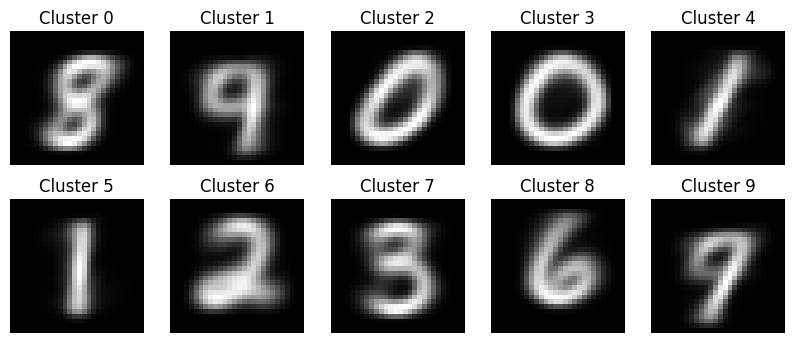

In [5]:
fig, axs = plt.subplots(2,5, figsize=(10,4))
axs = axs.ravel()
for i in range(10):
    axs[i].imshow(centers[i].reshape(28,28), cmap='gray')
    axs[i].set_title(f'Cluster {i}')
    axs[i].axis('off')
plt.show()

## 6. PCA 2D Projection for Visualizing Cluster Boundaries

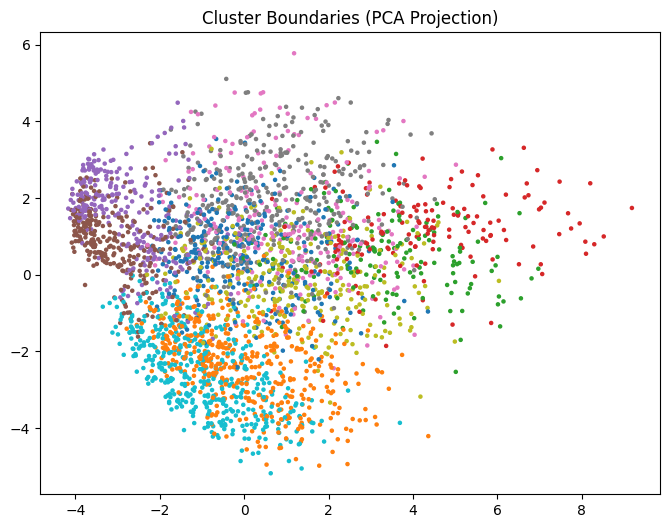

In [6]:
pca = PCA(n_components=2)
X2 = pca.fit_transform(X[:3000])
y2 = pred_labels[:3000]

plt.figure(figsize=(8,6))
plt.scatter(X2[:,0], X2[:,1], c=y2, s=5, cmap='tab10')
plt.title('Cluster Boundaries (PCA Projection)')
plt.show()

## 7. Confusion Matrix

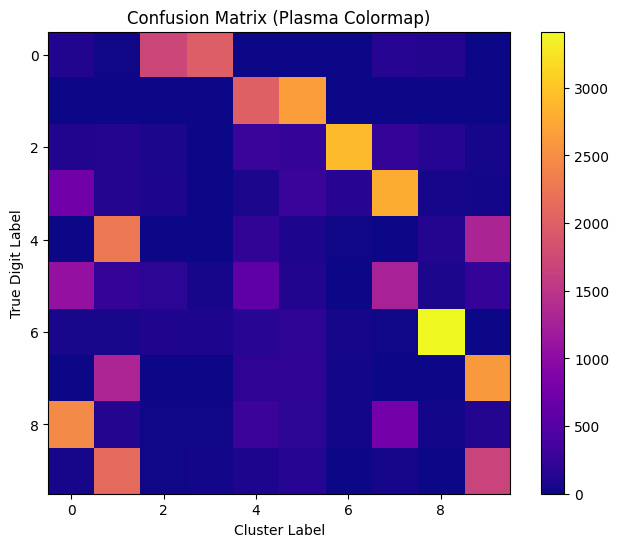

In [10]:
cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='plasma')
plt.colorbar()
plt.xlabel('Cluster Label')
plt.ylabel('True Digit Label')
plt.title('Confusion Matrix (Plasma Colormap)')
plt.show()

